# Exploratory Data Analysis on Food Choices
#### By Vedant Thakur

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('food_choices.csv')

In [3]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [4]:
df.shape

(125, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [6]:
parameters = ['Gender','calories_day','coffee','diet_current_coded','eating_out','employment','exercise','income','weight']
df1 = df[parameters]

In [7]:
df1.head()

,Gender,calories_day,coffee,diet_current_coded,eating_out,employment,exercise,income,weight
0,2,NaN,1,1,3,3.0,1.0,5.0,187
1,1,3.0,2,2,2,2.0,1.0,4.0,155
2,1,4.0,2,3,2,3.0,2.0,6.0,I'm not answering this.
3,1,3.0,2,2,2,3.0,3.0,6.0,"Not sure, 240"
4,1,2.0,2,2,2,2.0,1.0,6.0,190


In [8]:
df1.isnull().sum()

Gender                 0
calories_day          19
coffee                 0
diet_current_coded     0
eating_out             0
employment             9
exercise              13
income                 1
weight                 2
dtype: int64

In [9]:
df1.dropna(inplace=True)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_13568\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [10]:
df1['calories_day'].unique()

array([3., 4., 2.])

In [11]:
df1['calories_day'] = df1['calories_day'].astype(int)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_13568\4108883682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['calories_day'] = df1['calories_day'].astype(int)


In [12]:
df1.isnull().sum()

Gender                0
calories_day          0
coffee                0
diet_current_coded    0
eating_out            0
employment            0
exercise              0
income                0
weight                0
dtype: int64

Visualisations

In [13]:
def map_employment(x):
    if 1.0 <= x < 2.0:
        return 'Full Time'
    elif 2.0 <= x < 3.0:
        return 'Part Time'
    elif x == 3.0:
        return 'No'
    else:
        return 'Other'

df1['employment'] = df1['employment'].apply(map_employment)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_13568\2707143201.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['employment'] = df1['employment'].apply(map_employment)


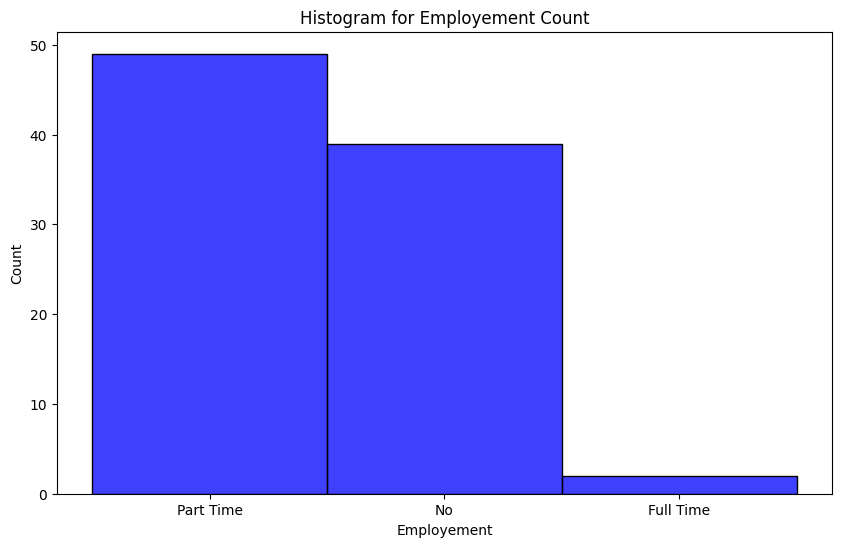

In [18]:
plt.figure(figsize=(10,6))
plt.title('Histogram for Employement Count')
sns.histplot(df1['employment'], color='blue')
plt.xlabel('Employement')
plt.ylabel('Count')
plt.show()

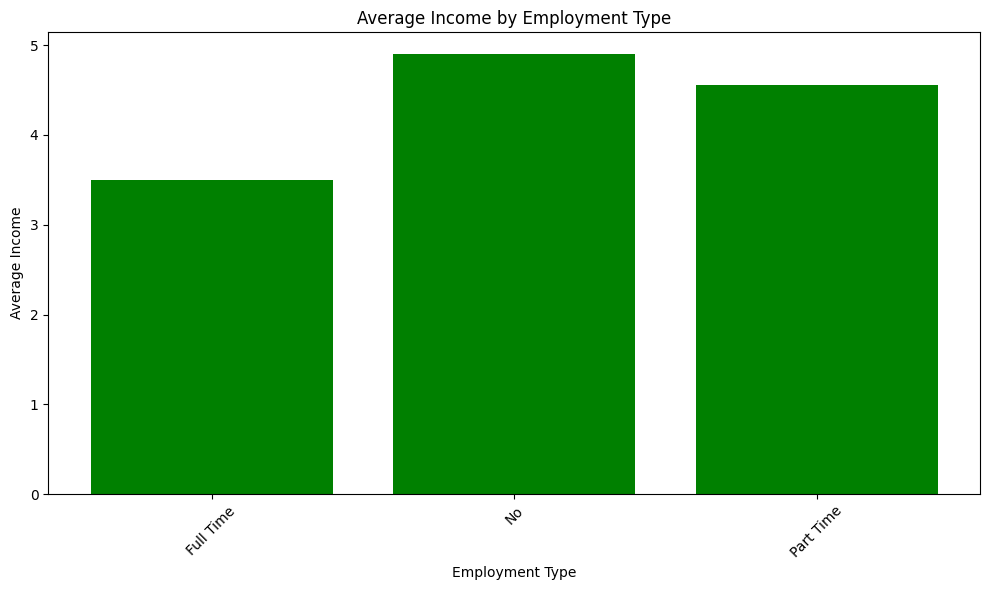

In [22]:
avg_income = df1.groupby('employment')['income'].mean()

plt.figure(figsize=(10, 6))
plt.title('Average Income by Employment Type')
plt.bar(avg_income.index, avg_income.values, color='green')
plt.xlabel('Employment Type')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

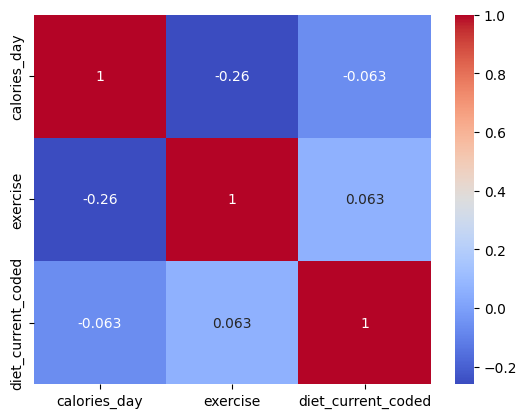

In [26]:
correlation = df[['calories_day', 'exercise', 'diet_current_coded']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()